## <font color='green'>Overview</font>

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney
Diseases**. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

#### Importing required libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
import joblib

#### Removing the warnings

In [2]:
warnings.filterwarnings('ignore')

#### Reading the csv file and displaying first 15 records

In [5]:
df = pd.read_csv('diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In the above table, following are the independent variable(s):-
    
   * **Pregnancies:** The number of times a woman has been pregnant.<br><br>
   
   * **Glucose:** Plasma glucose concentration after a 2-hour oral glucose tolerance test. It is a measure of the blood sugar level.<br><br>
   
   * **BloodPressure:** Diastolic blood pressure (mm Hg) of the patient.<br><br>
   * **SkinThickness:** Thickness of the skinfold at the triceps. It's a measure of subcutaneous fat.<br><br>
   * **Insulin:** 2-hour serum insulin level (mu U/ml).<br><br>
   * **BMI:** BMI is a measure of body fat based on a person's weight and height.<br><br>
   * **DiabetesPedigreeFunction:** It is a function that scores the likelihood of diabetes based on family history.<br><br>
   * **Age:** Age of the patient.<br><br><br>

Following are the dependent variable(s):-
    
   * **Outcome:** It has two values: 0 and 1. 0 indicates that the person is not a diabetes patient, while 1 indicates that the person is a diabetes patient.

## <font color='green'>Data Exploration</font>

#### Basic metadata of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Number of rows and columns

In [5]:
df.shape

(768, 9)

The above output indicates that this dataset contains **768 rows** and **9 columns**.

#### Checking NA values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The above output indicates there isn't any **NA** values present in the columns.

#### Average numbers of all columns

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**The above output indicates that:-**

  *  **Pregnancies:** On average, individuals with diabetes (Outcome 1) tend to have a higher number of pregnancies compared to those without diabetes (Outcome 0).<br><br>
  
  * **Glucose:** Individuals with diabetes (Outcome 1) have, on average, a higher glucose level compared to those without diabetes (Outcome 0). This aligns with the general understanding that high glucose levels are associated with diabetes.<br><br>
  
  * **BloodPressure:** The mean blood pressure is slightly higher for individuals with diabetes (Outcome 1) compared to those without diabetes (Outcome 0).<br><br>
  
  * **SkinThickness:** On average, individuals with diabetes (Outcome 1) have a higher skinfold thickness compared to those without diabetes (Outcome 0). This might indicate a higher level of subcutaneous fat.<br><br>
  
  * **Insulin:** Individuals with diabetes (Outcome 1) have a higher mean insulin level compared to those without diabetes (Outcome 0).<br><br>
  
  * **BMI:** On average, individuals with diabetes (Outcome 1) have a higher BMI compared to those without diabetes (Outcome 0). Higher BMI is often associated with increased risk of diabetes.<br><br>
  
  * **DiabetesPedigreeFunction:** The mean diabetes pedigree function is higher for individuals with diabetes (Outcome 1) compared to those without diabetes (Outcome 0). This suggests a stronger family history of diabetes in individuals with diabetes.<br><br>
  
  * **Age:** On average, individuals with diabetes (Outcome 1) are older than those without diabetes (Outcome 0). Age is a known risk factor for diabetes.<br><br>

#### Correlation matrix and its visualization using heatmap

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

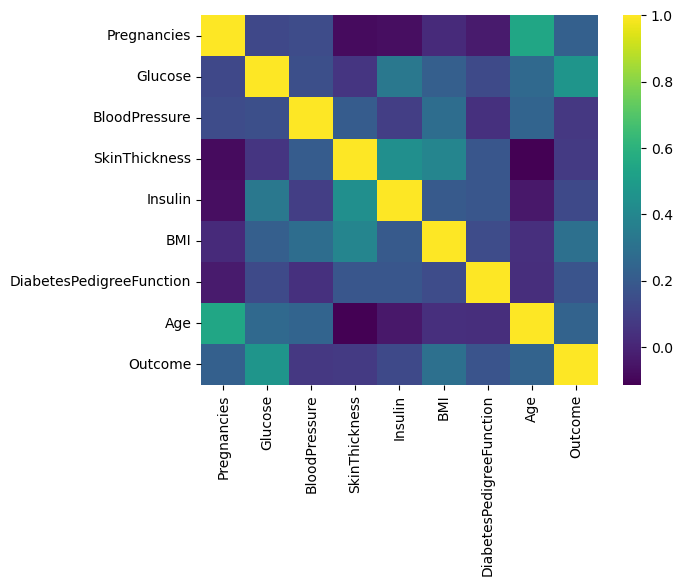

In [8]:
correlation = df.corr()
display(correlation)
sns.heatmap(correlation, cmap="viridis")

## <font color='green'>Spliting the dataset into training and testing data</font>
The dataset is divided into training data and testing data where the test size is 0.3 (30%) which means 30% of data is testing data and 70% data is training data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Outcome', axis='columns'),df.Outcome,
                                                    test_size=0.2, random_state=10, stratify=df.Outcome)

<br>

#### 614 records in training data

In [7]:
X_train.shape

(614, 8)

#### 154 records in testing data

In [8]:
X_test.shape

(154, 8)

## <font color='green'>ML Model Preparation</font>

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

#### Predicting the outcome

In [80]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

The above array has **0** and **1** value, where:-
   * 0: Non-Diabetes patient
   * 1: Diabetes patient

#### Accuracy score

In [81]:
accuracy = accuracy_score(prediction, Y_test)
accuracy

0.8116883116883117

In [83]:
filename = 'Model.sav'
joblib.dump(model, filename)

['Model.sav']